In [1]:
## Imports

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Prepare the Data


In [2]:
# Loading data
file_path = Path("Resources/myopia.csv")
beg_myopia_df = pd.read_csv(file_path)

labels = beg_myopia_df['MYOPIC']

beg_myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#Remove the "MYOPIC" column from the dataset.
beg_myopia_df = beg_myopia_df.drop(columns=['MYOPIC'])

# Find null values (if any)
for column in beg_myopia_df.columns:
    print(f"Column {column} has {beg_myopia_df[column].isnull().sum()} null values")

# Find duplicate entries (if any)
print(f"Duplicate entries: {beg_myopia_df.duplicated().sum()}")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Duplicate entries: 0


In [4]:
beg_myopia_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [5]:
# Standarize data with StandardScaler
myopia_scaled = StandardScaler().fit_transform(beg_myopia_df)
print(myopia_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


## Apply Dimensionality Reduction

In [6]:
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(myopia_scaled)

myopia_pca_df = pd.DataFrame(data = myopia_pca)

myopia_pca_df

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183
...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581


In [7]:
myopia_pca.shape

(618, 10)

In [8]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()


0.9187361702915186

In [9]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results.
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

# The dataset has 2 columns
tsne_features.shape

c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(618, 2)

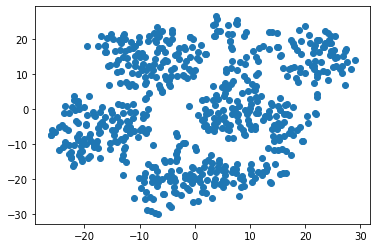

In [10]:
#Create a scatter plot of the t-SNE output.

# Prepare to plot the dataset

# The first column of transformed features
myopia_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
myopia_pca_df['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'])
plt.show()

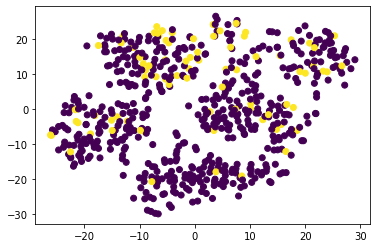

In [11]:
labels.value_counts()

plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=labels)
plt.show()

## Perform a Cluster Analysis with K-means

c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only su

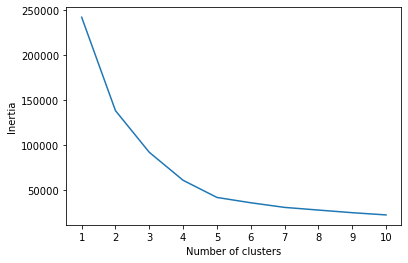

In [12]:
# Create an elbow plot to identify the best number of clusters.
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


## The elbow bend is seen on K = 5. Because the dataset is relatively small, I tested K = 3, K = 5 and K = 6 to see how the clusters changed.

In [13]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

# get clusters using K = 5

clusters = get_clusters(5, myopia_pca_df)
clusters

c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,0,1,2,3,4,5,6,7,8,9,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,5.658178,11.386476,3
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-9.744816,11.696257,3
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1.577762,-22.179167,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,-21.478231,-3.532085,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,16.309568,1.060785,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.237547,1.146547,-1.546054,-0.248834,2.326683,-0.202403,0.084104,0.705501,-0.854993,0.736996,6.495380,17.668207,1
614,-0.649011,-1.796952,-0.823592,0.564878,0.134282,0.348639,-0.174354,0.252875,1.022202,-0.544105,-9.590679,11.161777,3
615,-0.890082,-2.308005,0.268102,0.262770,0.231606,0.566061,-0.328287,-0.489877,1.822691,0.081777,-10.301506,10.002417,3
616,-1.124000,0.451890,0.001659,-0.847089,-0.143347,-0.414353,-0.448120,0.239685,-1.592822,-1.014581,-6.831184,-17.818699,0


## K = 5 Chart

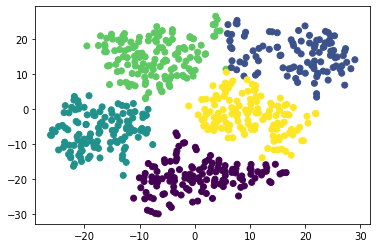

In [14]:
plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=clusters["class"])
plt.show()

c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


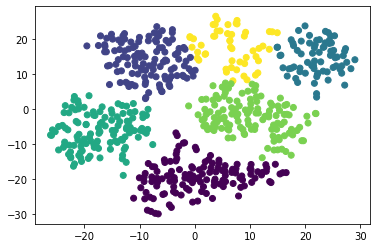

In [15]:
# get clusters using K = 6

clusters6 = get_clusters(6, myopia_pca_df)
clusters6

plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=clusters6["class"])
plt.show()

c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\laure\anaconda3\envs\PythonDataOne\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


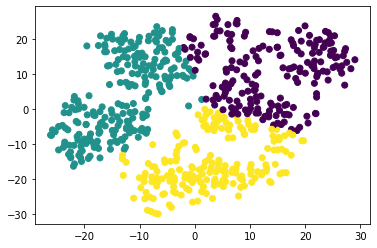

In [16]:
# get clusters using K = 3

clusters3 = get_clusters(3, myopia_pca_df)
clusters3

plt.scatter(myopia_pca_df['x'], myopia_pca_df['y'], c=clusters3["class"])
plt.show()

## Make a Recommendation

I recommend grouping patients into five clusters.